In [ ]:
from IPython.core.display import HTML
def set_width(width):
    display(HTML(f"""<style>  
            .container {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} 
            .jp-Cell {{ width:{width}% !important; 
                            min-width:800px !important; margin: 0 auto}} </style>"""))
# Set container width to X% of the fullscreen 
set_width(50)

# 9B: Digital Filtering and Averaging (SCR)
> <font color='blue'>Learning goals:</font> explore the options of digital filtering and averaging, for reducing the noise in your acquired signal. 

Structure of an experiment:
- Background + Anticipate + Simulate(25 min): per person. This is homework and should be finished **before** you start your 4 hours practicum session
- Implement + Investigate (60 min): with your partner (group of 2)
- Compare + Conclude (15 min): with a group of 4 (per table)


## BACKGROUND
> <font color='grey'>⏳ Estimated time: 5 min</font>

Analog filters use electronic circuits made up of capacitors, resistors etc. in order to produce the required filtering effect. Thus, the signal being filtered is an electrical voltage or current which is the direct analog of the physical quantity involved (eg. sound, video signal). Hence, analog filters are utilized for instance for (high or low frequency) noise reduction. 

**Digital filters** on the other hand use a digitial processor to perform numerical calculations on the signal. In order for this to happen, the analog input must first be sampled and digitised using an ADC (analog to digital converter). Only then, the processor may carry out the numerical calculations. The result of this may then be converted back to an analog signal through a DAC (digital to analog converter). 
Digital filters can either work in the time domain, or the frequency domain. In time domain, you can use a moving average, which averages within one timetrace, over a window (multiple datapoints) around the actual datapoint.  
In frequency domain, particularly for a known and single frequency content, unwanted frequencies can be reduced to zero. 

**Averaging** is another data operation which can suppress noice. If you acquiring the same signal multiple times, then you can average over those multiple times. The signal will remain, while the random noise is averaged out. 

<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/PicoPI/9B_digital_filtering_averaging.JPG" width=60%></img>


## ANTICIPATE: differences between digital filtering and averaging
> <font color='grey'>⏳ Estimated time: 10 min</font>

In this assignment you will acquire a noisy signal, by recording the light from a LED at large distance. The voltage applied to the LED is a 70 Hz sine. In the previous assignments you have seen the use of an anti-averaging filter, in this assignment you will explore digital filtering (by suppressing all frequency except the input one in the frequency spectrum) and averaging. 

Before going into the lab:
* Argue whether you need triggering for 1. digital filtering, and 2. averaging
* Give at least one pro and con of 1. digital filtering, and 2. averaging


In [ ]:
### TO DO=" Argue whether you need triggering for 1. digital filtering, 2. averaging"




### TO DO ="Give at least one pro and con of 1. digital filtering, and 2. averaging"


##  SIMULATE: averaging
> <font color='grey'>⏳ Estimated time: 10 min</font>

Run the following code a couple of times, as simulation for a set of noisy acquisition. Afterwards look at the averaged signal over 10 acquisitions. 
* Figure out how the two np.random.random in line 11 are contributing?
* Does the second graph looks good to you? Why or why not? 
* If you look at the limit of the y-axis, does your previous answer still hold?
* What can you learn from this simulation for your later acquisition (of a noisy signal to be averaged)?


(<Axes: >, [<matplotlib.lines.Line2D at 0x2ae6ed9d1b0>])

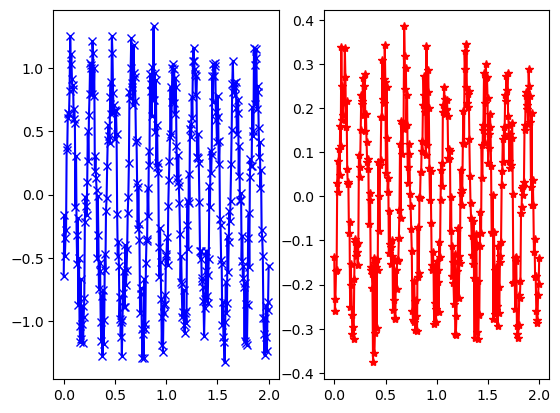

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Nsamples = 350
duration = 2 # seconds
time = np.linspace(0,duration,Nsamples)
freq1 = 5.0 # Hz


VV=np.zeros((10, len(time)))
for ii in range(10):
    VV[ii,:]= np.sin( freq1 * 2.0 * np.pi * time+2.0 * np.pi*np.random.random()) + 0.7*(np.random.random(len(time))-0.5)
    if ii==0: plt.subplot(1,2,1), plt.plot(time, VV[ii,:],'b-x'), #plt.ylim([-1.5,+1.5])
plt.subplot(1,2,2), plt.plot(time, np.mean(VV,0),'r-*'), #plt.ylim([-1.5,+1.5])

In [ ]:
### TO DO="1. function of the two np.random.random"

### TO DO="2. why (or why not) does the second graph look good"


### TO DO="3. what did you learn and will you adapt in your later experiment"


* Precap (pydaq 10 became week 9C, pydaq 11 week 9B): https://www.youtube.com/watch?v=8azdBqbswYU


## IMPLEMENT & INVESTIGATE 1: Acquisition of noisy signals
> <font color='grey'>⏳ Estimated time: 25 min</font>


<img src="https://gitlab.tudelft.nl/mwdocter/nb2214-images/-/raw/main/ELC/9B_photodiode_LED.jpg" width=60%></img>

**Exercise 1.1**: Do the following.
* Connect the (tall) photodiode to the scope and breakout box
* Connect the (small) LED to the function generator (Sine, 70 Hz, 1 Vpp, 1.2 Vdc offset). The offset is required for supplying the LED with an always positive voltage (a diode is unidirectional, as will be explained later in this course).
* At 10 cm distance you see a reasonable Vout of around 25 mVpp. Increase the distance till you see a noisy sine wave (**$<5$ mV**). Adjust the amplitude on the generator if necessary.

> <font size=4>ℹ️</font> <b>Hints</b> <br>
> * try to get the noise level similar to the amplitude of your sine. The effect of filtering result will be much more convincing when using a lower SNR (Signal to noise ratio).
> * think about triggering (SIMULATE). What happens if you do not use triggering? If you need triggering, which triggering signal will you use?

**Exercise 1.2**: Copy and adjust the correct code from exercise of Analog input (you used it in 9A) to acquire 100 signals of 200 samples at 10 times the signal frequency. (so repeat 100 times signal aquisition, remember to store them ALL in one 2D array)

In [ ]:
## your code, first part: acquisition. 
# Double check np.shape(measurement )=(100,200), and plot one figure to see the actual data 
# will you use triggering, or not: task.triggers.start_trigger.cfg_dig_edge_start_trig(trigger_source = "/Dev1/PFI0", trigger_edge = Edge.RISING)
# if you use a block wave from the func gen as trigger signal, make sure the amplitude is 5V, and the offset 2.5 V

# maybe smart to save the data, so you can continue working on it outside SCR:
#np.save('data_9B_measure', measurement2)
#measurement2 = np.load(r'data_9B_measure.npy')
# if you are saving data, save both the measurement and the sampling rate

In [ ]:
### TO DO="re-use previous acquisition code" __ # taken from the anti-aliasing assignment 9B


## IMPLEMENT & INVESTIGATE 2: Digital filtering
> <font color='grey'>⏳ Estimated time: 15 min</font>


There are many different digital filter types, but we will just explore one: the Butterworth filter (You might see this and other filters in the Signal&Systems course in more detail). <br>
The task is simple, adapt the code below, using an existing function, and add frequency plots.

**Exercise 2.1**: Copy-paste your `calculate_fft()` function.

In [ ]:
### TO DO="add here your calculate_fft" 


**Exercise 2.2**: Adapt the code below, using an existing function, and add frequency plots. At the bottom of this document, we give you some more code that you might find useful.

<details>
<summary><font size=4>ℹ️</font> <b>Hints</b></summary> <br>
You will use a function below which you have not seen before: scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)[source]: feel free to use Google as your best friend, or read the following explanation
    
The value Wn needs to be normalized, which means you rescale the frequency value to a range between 0 and 1; where 1 corresponds to the Nyquist frequency

| regular scale  | scaled version   |  
|---|---|
| 0  | 0  |   
| $f_{selected}$  | Wn =??  |  
| $f_N$  |  1 |  
    
It is up to you rescale Wn to be a value between 0 and 1.
    
<details>
<summary><font size=4></font> What would the value Wn be for f_selected = 60 Hz and f_N = 80 Hz?</summary> <br>
the answer is 60 Hz/80 Hz=0.75
</details>

In [ ]:
## Apply digital filtering ... adapt the code below
# some more details on changing the current folder, or manouvering through folders, ...
# there is additional code at the end of the document

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

dataALL=np.load(r'data_9B_measurement2.npy') #if you saved the data, change the name to the name you used!!!!
sampling_rate=np.load(r'data_9B_sampling_rate.npy') #otherwise input the values yourself (remember the variables carry over between cells)

data=dataALL[0,:]
tt=np.arange(0,len(data))/sampling_rate

# scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)[source]
# For digital filters, Wn needs to be normalized, with a value from 0 to 1, 1 corresponds to the Nyquist frequency

N=1 # order filter, start with 1st order, optionally explore other values

Wn=... 
b, a = signal.butter(N, Wn,btype='lowpass')
w, h = signal.freqs(b, a) 
y1 = signal.lfilter(b, a, data)

Wn=..
b, a = signal.butter(N, Wn,btype='highpass')
w, h = signal.freqs(b, a) 
y2 = signal.lfilter(b, a, data)

Wn=[...,...] # bandpass, so Wn is an array with two values
b, a = signal.butter(N,Wn,btype='bandpass')
w, h = signal.freqs(b, a)
y3 = signal.lfilter(b, a, data)

plt.figure(figsize=(14,7))#adjust to your liking
plt.subplot(1,2,1), plt.plot(tt, data, 'k',tt,y1,'r',tt,y2,'g',tt,y3,'b') 
# add labels to axis
plt.subplot(1,2,2), ... # add here a frequency plot for all data plotted in the previous subplot
# add labels to axis
#plt.subplots_adjust(wspace = 1) #uncomment if the plots/labels of plots overlap
plt.savefig('image_filtering.jpg') # saved on the TUDelft computer, don't forget to copy your data!

## IMPLEMENT & INVESTIGATE 3: Averaging
> <font color='grey'>⏳ Estimated time: 20 min</font>

**Exercise 2.3**: Average the noisy (unfiltered) data, with np.mean.
Adapt the code below to make six subplots, which will be used for evaluation of the two techniques.

Don't forget to add labels!

In [ ]:
## your averaging code, produce 6 subplots: time signal and frequency spectrum, both for a single trace and for the averaged trace
m_av=np.mean(...,axis=...)

plt.figure(figsize=(14,7))
plt.subplot(2,3,1),  # plot the averaged signal, include the correct time axis + labels
...
plt.title('averaged signal')

plt.subplot(2,3,2), # plot one single noisy trace, to see the improvement
...
plt.title('single noisy signal')


plt.subplot(2,3,3) # plot a digitally filtered trace
plt.plot(...) #something with y3
...

plt.subplot(2,3,4) #fourier transform of the averaged signal
...

plt.subplot(2,3,5) #fourier transform of the single noisy trace
...

plt.subplot(2,3,6) #fourier transform of the digitally  filtered signal
...

#plt.subplots_adjust(wspace = 1) #uncomment if the plots/labels of plots overlap
plt.savefig('image_averaging.jpg') # automatically save with Pillow (pip install Pillow )



In [ ]:
### TO DO="copy the above code and adapt"


> <font size=4>ℹ️</font> <b>Hints</b> <br>
if your averaged signal does not resemble a sine, then double check whether you did correctly trigger. You could plot the first 10 traces for example. 

## COMPARE & CONCLUDE:
> <font color='grey'>⏳ Estimated time: 15 min</font>

* Wait till all (4) group members finish their observation
* Compare your results with your other group members. 
* If your results agree, and are in line with all predictions, then talk to a TA and get checked off
* Otherwise, so if your results do not agree, or your results are not in line with your predictions, then first discuss amongst your group before getting a TA. 

**to be checked off by a TA:**
Using your last image, in which averaging and filtered results are displaced, reflect on your predictions:
1. Is triggering required for 1. digital filtering, and 2. averaging
2. Which approach do you prefer, digital filtering or averaging? (which pros and cons do you find more important)
3. Exit card: 
    1. Write a brief abstract on what you learned (conclusion, useful graph), 
    2. Which troubleshooting skills do you want to remember for next sessions, 
    3. Which code do you copy for use in next sessions,
4. How do you think this notebook could be improved

In [ ]:
#9B filtering and averaging
### TO DO ="reflect on whether triggering is required for figital filtering and/or averaging"

### TO DO="Explain whether you prefer difital filtering or triggering"

### TO DO="3a. abstract"

### TO DO="3b. troubleshooting"

### TO DO="3c. code"

### TO DO="4. what changes would you suggest?"





## <font color='red'> Additional useful code for data and folder handling:</font> 

In [ ]:
# USEFUL CODE TO CHANGE THE PATH / FOLDER YOU ARE IN NOW

from pathlib import Path

data_folder = Path(r'C:\your_file_path')
file_to_open = data_folder / 'data_9B.npy'
data=np.load(file_to_open)

In [ ]:
# USEFUL CODE TO SCAN THROUGH FOLDERS AND FOLDER NAMES
import os
from pathlib import Path
print(os.getcwd())
yourfoldername=r'C:\fill_in_your_folder_name_here'
print(os.path.exists(yourfoldername))
os.chdir(yourfoldername)
print(os.getcwd())
os.listdir()

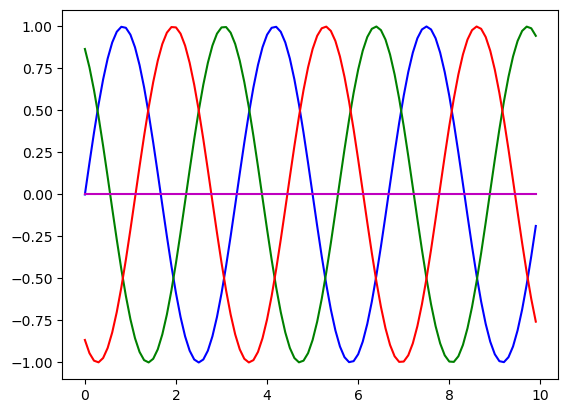

In [6]:
import numpy as np
import matplotlib.pyplot as plt
tt=np.arange(0,10,0.1)
s1=np.sin(2*np.pi*.3*tt)
s2=np.sin(2*np.pi*.3*tt+np.pi*2/3)
s3=np.sin(2*np.pi*.3*tt+np.pi*4/3)
plt.plot(tt,s1,'b',tt,s2,'g',tt,s3,'r',tt,s1+s2+s3,'m')